In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [19, 8] 

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Variables

A variable is nothing but data. In a dataframe the columns are called variables.

The variables are of 2 types:

* Dependent Variable
* Independent Variable

**Dependent Variable:**

The variable whose value is to be forecasted or predicted is the dependent variable.

The value of the dependent variable is dependent on the values of the independent variables.

Dependent variables are also called response variables or target variables.

Dependent variables are generally represented by the letter y.

**Independent Variables**

Independent variables are used to explain the dependent variable.

Independent variables do not depend on any other variable.

Independent variables are also called feature variables or regressors.

Independent variables are represented by the letter x.

# Regression

Regression is a statistical approach to analyze the relationship between a dependent variable and one or more independent variables.

Regression is used to determine the most suitable function that characterizes the relationship between dependent and independent variables.

## Linear Regression

Linear regression is a machine learning algorithm that depends on the linear relationship between a dependent variable and one or more independent variables.

Two variables are in linear relationship when their values can be represented using a straight line.

### Simple Linear Regression

A simple linear regression model has one independent variable that has a linear relationship with the dependent variable.

For more than one independent variables, it is called Multiple Linear regression.

### The Linear Equation

In mathematics, a straight line is represented by the equation: y = mx + c, where m is slope and c is a constant.

Using the above equation, the value of y (dependent variable) can be calculated using x (independent variable).

In statistics, the equation is written as: $ y = {\beta}_0 + {\beta}_1 x  + {\epsilon}$.

Here $ {\beta}_0 $ is the intercept, $ {\beta}_1 $ is the slope and ${\epsilon}$ is the error component.

Slope $ {\beta}_1 = {\delta}y / {\delta}x $.

Intercept $ {\beta}_0 $ = Distance on y axis when value of x is 0.

The error component (term), ${\epsilon}$, represents the distance of the actual value from the value predicted by the regression line.

When the relationship between the independent variable (x) and the dependent variable (y) is linear, Linear Regression model is applied to analyze the data.

#### Example

In [4]:
data = {'voltage': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
       'current': [0, 1, 2, 2.99, 4, 5, 6, 6.99, 8, 9, 10]
       }

In [5]:
df = pd.DataFrame(data)

In [6]:
df

,voltage,current
0,0,0.00
1,1,1.00
2,2,2.00
3,3,2.99
4,4,4.00
5,5,5.00
6,6,6.00
7,7,6.99
8,8,8.00
9,9,9.00


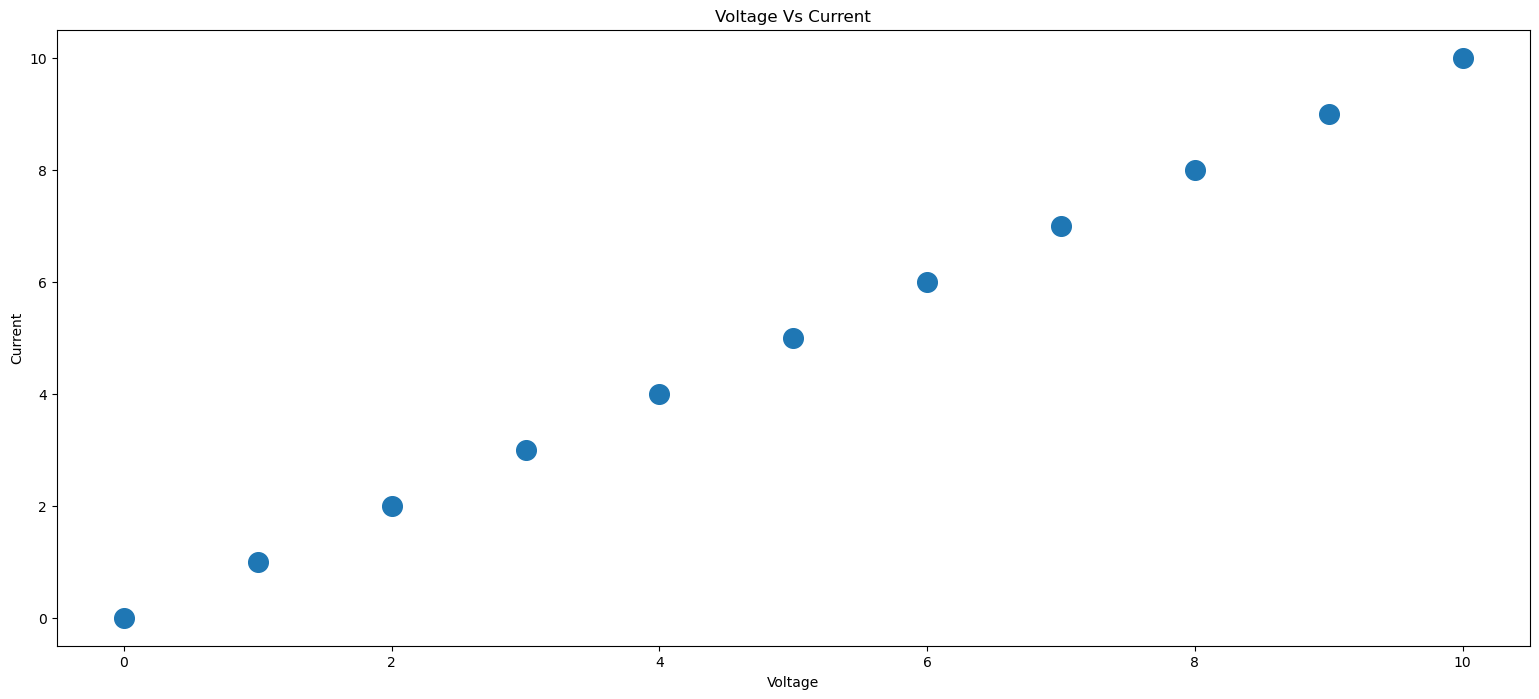

In [7]:
plt.scatter(data=df, x="voltage", y="current", s=200)
plt.title("Voltage Vs Current")
plt.xlabel("Voltage")
plt.ylabel("Current")
plt.show()

#### Example

In [8]:
homeprice = {'area': [2600, 3000, 3200, 3600, 4000], 'price': [550000, 565000, 610000, 680000, 725000]}

In [9]:
df = pd.DataFrame(homeprice)

In [10]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


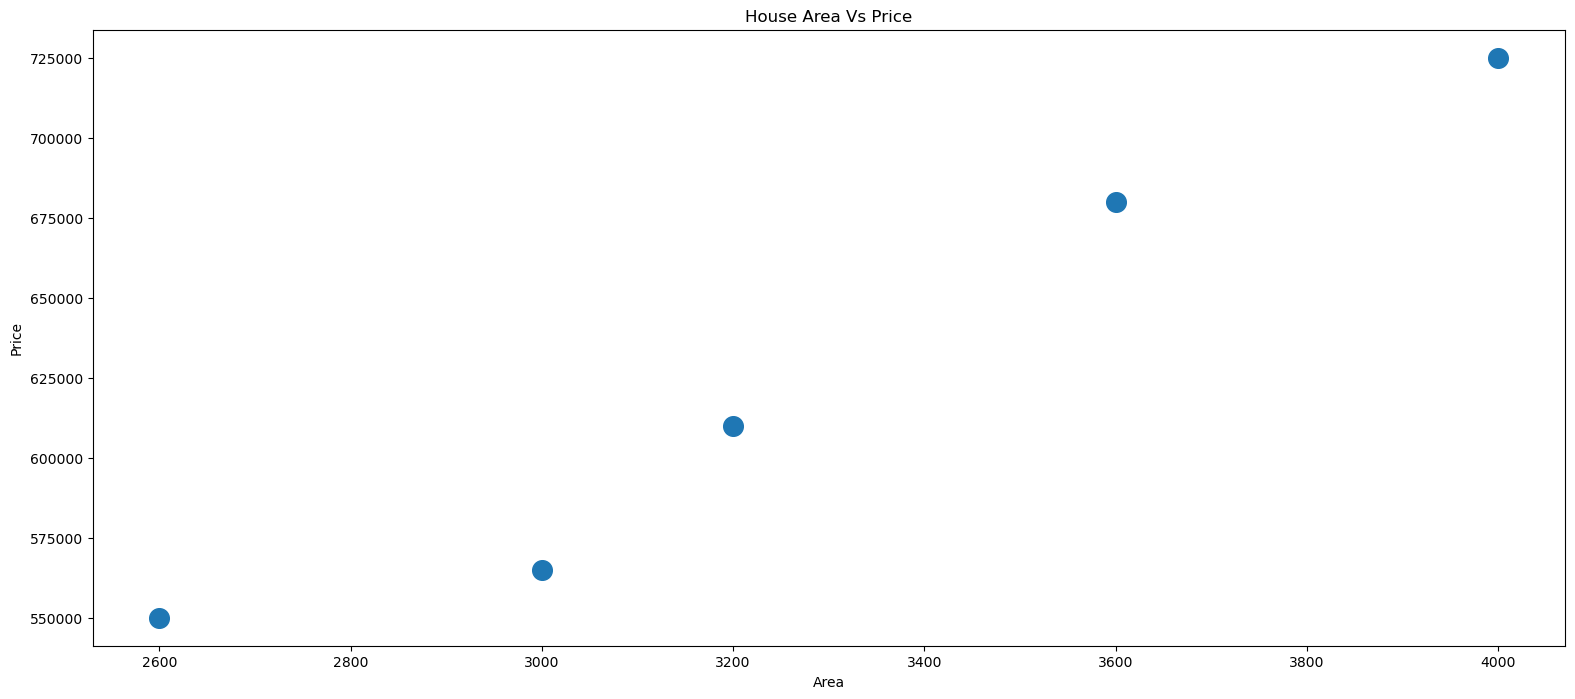

In [11]:
plt.scatter(data=df, x='area', y='price', s=200)
plt.title("House Area Vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

From the above plot, the data points can be connected more or less using a straight line. Hence we can apply Simple Linear regression machine learning model on the above data.

### Ordinary Least Square Method

The regression line that best explains the trend in the data is the best fit line.

The line may pass through all of the points or non of the points.

The method aims at minimizing the sum of squares of the error terms i.e., it determines the values of $ {\beta}_0 $ and $ {\beta}_1 $ at which the error terms are minimum.

$ {\beta}_0 = \bar{y} - {\beta}_1 \bar{x}$

$ {\beta}_1 = Cov(x, y) / Var(x) $

$ {\beta}_1 = {\sum} ((x - \bar{x}) (y - \bar{y})) / {\sum} (x - \bar{x}) ^ 2 $

### Measures of Variation

#### Sum of Squares Total (SST)

The sum of squares of total is the sum of squared difference between the target variable and its mean value.

It is also known as Total Sum of Squares (TSS).

SST = $ {\sum} (y - \bar{y})^ 2 $

#### Sum of Squares Regression (SSR)

The sum of squares regression is the sum of squared difference between the predicted value and the mean of the target variable.

It is also known as Regression Sum of Squares (RSS).

SSR = $ {\sum} (y_{predict} - \bar{y})^ 2 $

#### Sum of Squares of Error (SSE)

The sum of squares of error is the sum of squared difference between target variable and its predicted value.

It is also known as Error Sum of Square.

SSE = $ \sum (y - y_{predict}) ^ 2 $

#### Root Mean Squared Error (RMSE)

Root Mean Squared Error shows how concentrated or spread the data points are around the regression line.

RMSE = $ \sqrt {\bar{(y - y_{predict}) ^ 2}} $

Lower the value of RMSE generally mean that the points are closer to the regression line than the larger value.

#### Total Variation

SST = SSR + SSE

#### Coefficient of Determination $ R ^2 $

Gives the total percentage of variation that is explained by the target variable.

$ R^2 = SSR / SST $

$ R^2 = 1 - (SSE / SST) $

**Note:** $ 0 {\le} R^2 {\le} 1 $

### Case Study

#### Predict the Salary of an employee depending on the Years of Experience

##### Read the Data

In [12]:
salary_df = pd.read_csv("./datasets/Salary_Data.csv")

##### Exploratory Data Analysis

In [13]:
salary_df.shape

(30, 2)

In [14]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [15]:
salary_df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [16]:
salary_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


##### Data Visualization

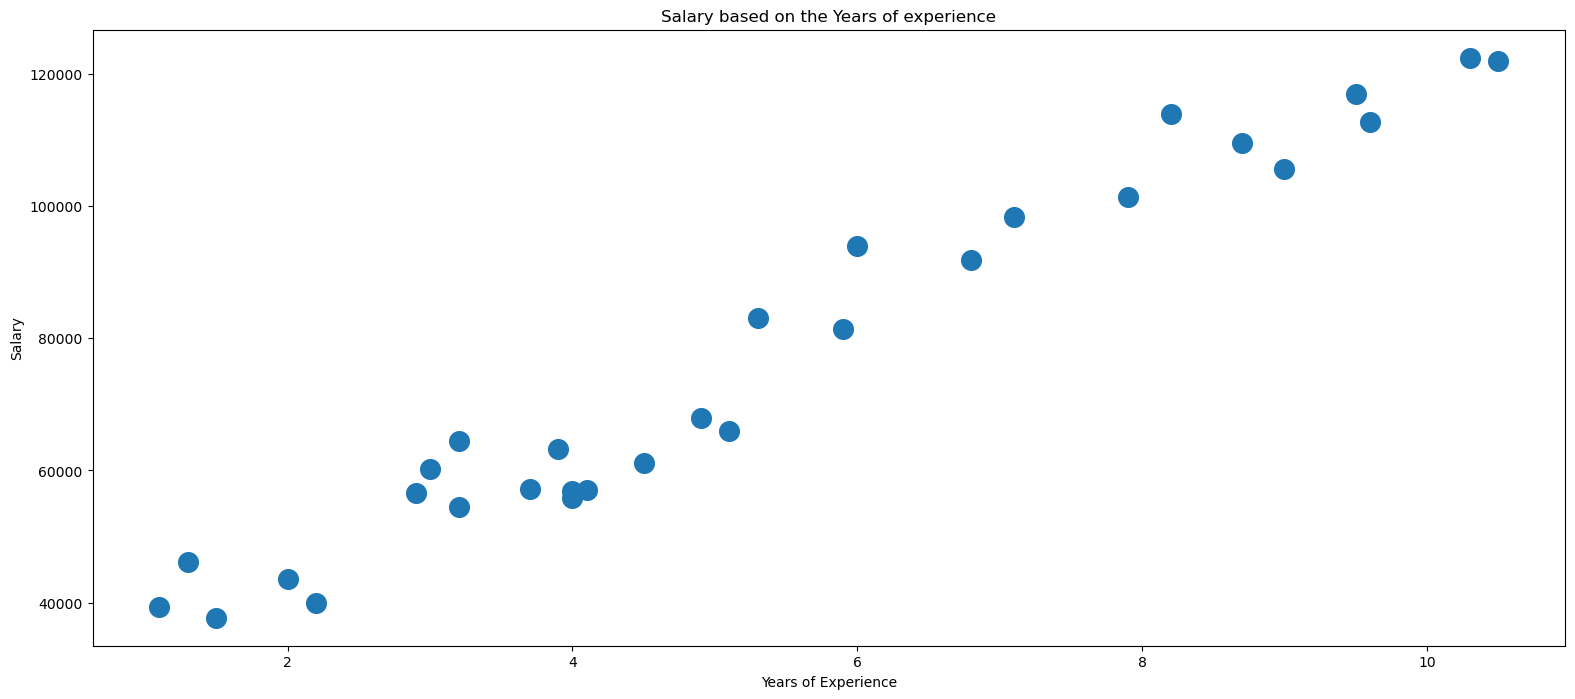

In [17]:
plt.scatter(data=salary_df, x='YearsExperience', y='Salary', s=200)
plt.title("Salary based on the Years of experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

The data shows linear relationship between YearsofExperience and Salary. Hence we can use Simple Linear Regression.

Independent Variable: YearsExperience

Dependent Variable: Salary

In [18]:
X = salary_df.loc[:, 'YearsExperience'].values

y = salary_df.loc[:, 'Salary'].values

##### Split the Data into Training and Test Data

The data will be divided into 2 parts: for training the model and for testing purpose.

Generally 70% of the rows are used for training and reamaining 30% for testing the model.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24,), (6,), (24,), (6,))

In [22]:
X_train.reshape(-1, 1).shape

(24, 1)

##### Train the model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
reg_model = LinearRegression()

In [25]:
reg_model.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

LinearRegression()

##### Find the coefficient m i.e., slope

In [26]:
reg_model.coef_

array([[9312.57512673]])

##### Find the intercept i.e., c

In [27]:
reg_model.intercept_

array([26780.09915063])

##### The R Squared Value/R2 Score on training dataset

In [28]:
reg_model.score(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

0.9411949620562126

##### Predict the Salary for the test data

In [29]:
y_predicted = reg_model.predict(X_test.reshape(-1, 1))

In [30]:
y_predicted

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [31]:
y_test

array([ 37731, 122391,  57081,  63218, 116969, 109431], dtype=int64)

##### Model Evaluation

In [32]:
from sklearn.metrics import r2_score

###### The R Squared Value/R2 Score

In [33]:
r_square = r2_score(y_test.reshape(-1, 1), y_predicted)

In [34]:
r_square

0.988169515729126

In [35]:
print(f"Accuracy = {r_square:.2%}")

Accuracy = 98.82%


In [36]:
reg_model.score(X_test.reshape(-1, 1), y_test.reshape(-1, 1))

0.988169515729126

##### Data Visualization

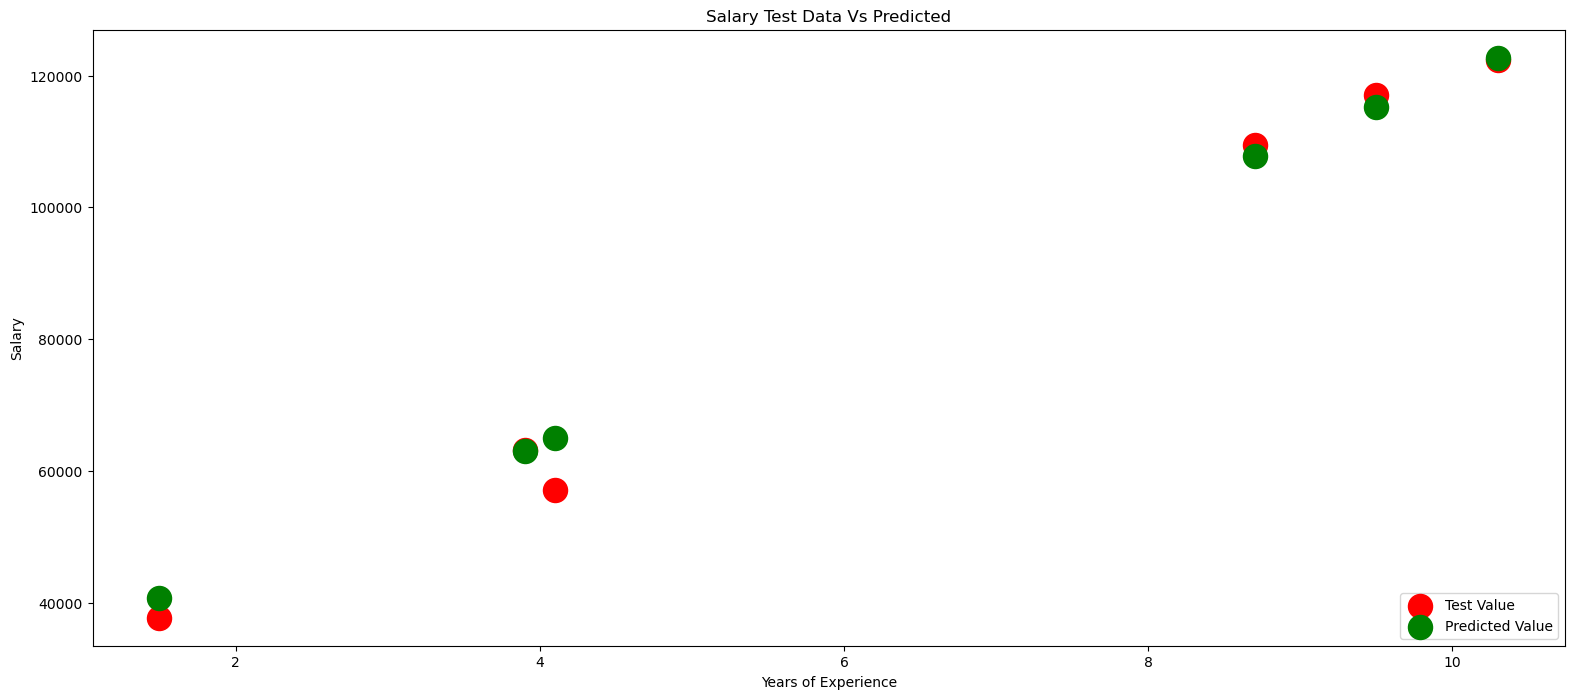

In [37]:
plt.scatter(x=X_test, y=y_test, color='red', s=300)
plt.scatter(x=X_test, y=y_predicted, color='green', s=300)
plt.title("Salary Test Data Vs Predicted")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend(["Test Value", "Predicted Value"], loc="lower right")

plt.show()

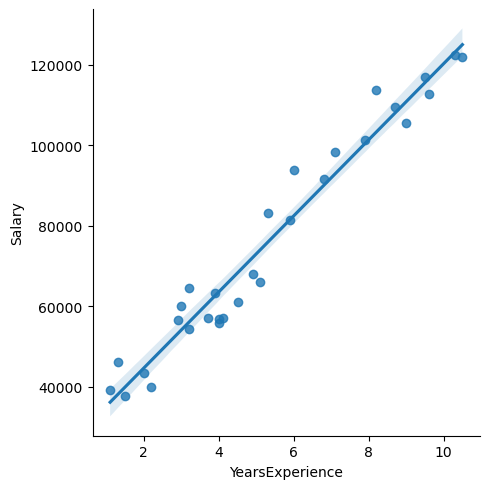

In [38]:
sns.lmplot(data=salary_df, x='YearsExperience', y='Salary')

plt.show()

## Multiple Linear Regression

Simple Linear Regression model takes only one independent variable to predict the dependent variable value.

Multiple Linear Regression model uses multiple independent variable to predict the dependent variable value.

The equation of a Multiple Linear Regression model will be of the form:

$ y = m{_1}x{_1} + m{_2}x{_2} + m{_3}x{_3} + ... + b $

Here y is the dependent or target variable, $ x{_1}, x{_2}, x{_3} $ are independent variables, $ m{_1}, m{_2}, m{_3} $ are coefficients of the independent variables and b is the intercept.

The relationship between y and $ x{_1}, x{_2}, x{_3} $ should be linear.

### Case Study

#### Prediction of Profit for the Startups

##### Read the data

In [39]:
startups_df = pd.read_csv('./datasets/50_Startups.csv')

##### Exploratory Data Analysis

In [40]:
startups_df.shape

(50, 5)

In [41]:
startups_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [42]:
startups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [43]:
startups_df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [44]:
startups_df.duplicated().sum()

0

##### Data Visualization

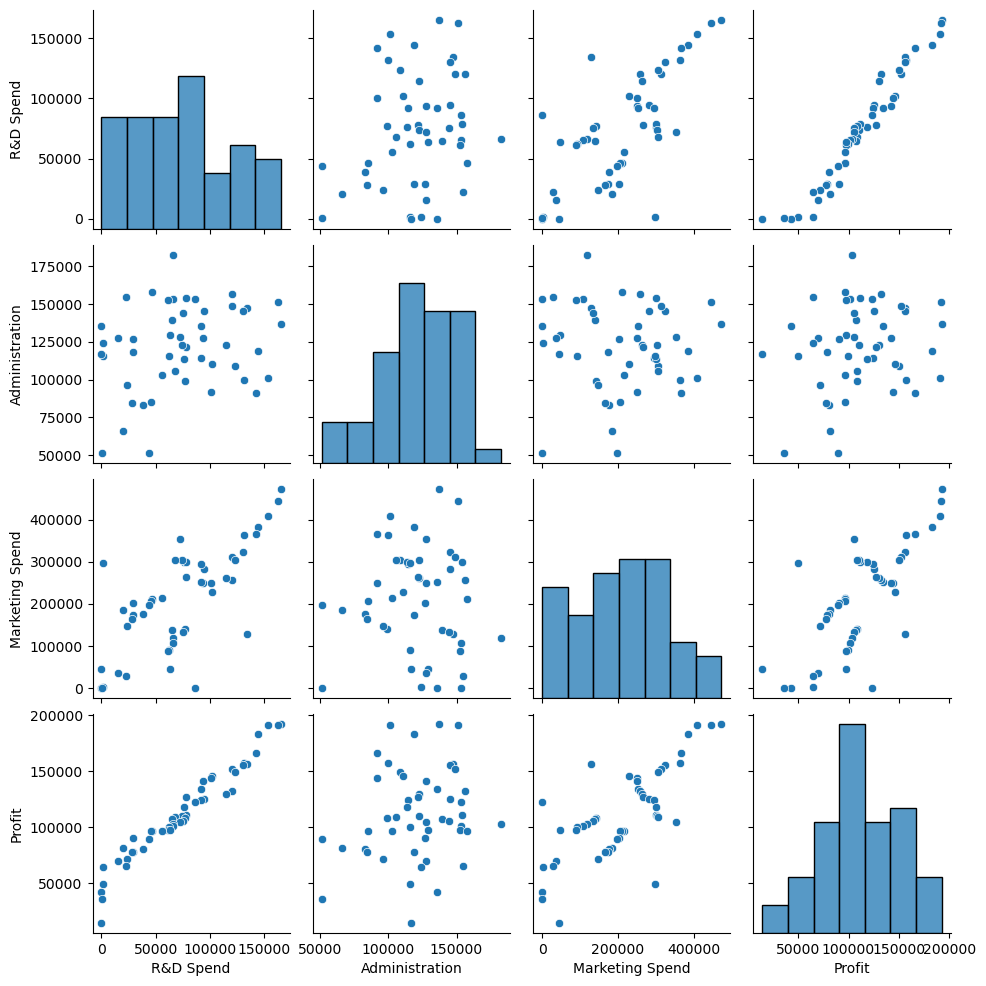

In [45]:
sns.pairplot(data=startups_df)

plt.show()

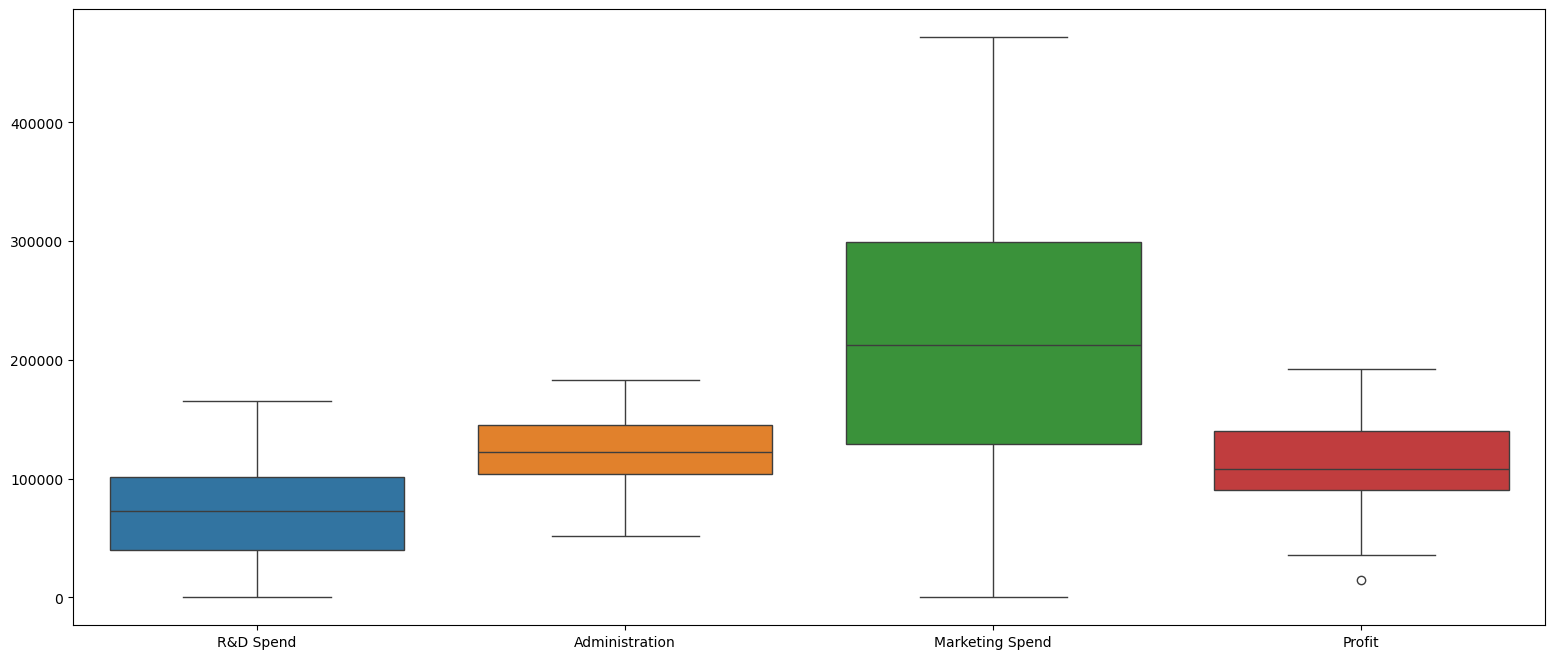

In [46]:
sns.boxplot(data=startups_df)

plt.show()

##### Data Encoding

In [47]:
startups_df = pd.get_dummies(data=startups_df, columns=['State'], drop_first=True, dtype=np.int64)

In [48]:
startups_df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


##### Data Normalization

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
startups_df = pd.DataFrame(scaler.fit_transform(startups_df), columns=startups_df.columns)

In [52]:
startups_df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,2.016411,0.560753,2.153943,2.011203,-0.685994,1.393261
1,1.955860,1.082807,1.923600,1.999430,-0.685994,-0.717741
2,1.754364,-0.728257,1.626528,1.980842,1.457738,-0.717741
3,1.554784,-0.096365,1.422210,1.776627,-0.685994,1.393261
4,1.504937,-1.079919,1.281528,1.357740,1.457738,-0.717741


In [53]:
startups_df.describe()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-7.549517e-17,-2.564615e-16,-1.554312e-16,-5.151435e-16,-7.549517e-17,-1.043610e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.622362e+00,-2.525994e+00,-1.743127e+00,-2.439313e+00,-6.859943e-01,-7.177406e-01
25%,-7.434983e-01,-6.350458e-01,-6.750713e-01,-5.481991e-01,-6.859943e-01,-7.177406e-01
50%,-1.475621e-02,4.885871e-02,1.396931e-02,-1.011113e-01,-6.859943e-01,-7.177406e-01
75%,6.135700e-01,8.471792e-01,7.305723e-01,6.955535e-01,1.457738e+00,1.393261e+00
max,2.016411e+00,2.210141e+00,2.153943e+00,2.011203e+00,1.457738e+00,1.393261e+00


##### Outlier Treatment

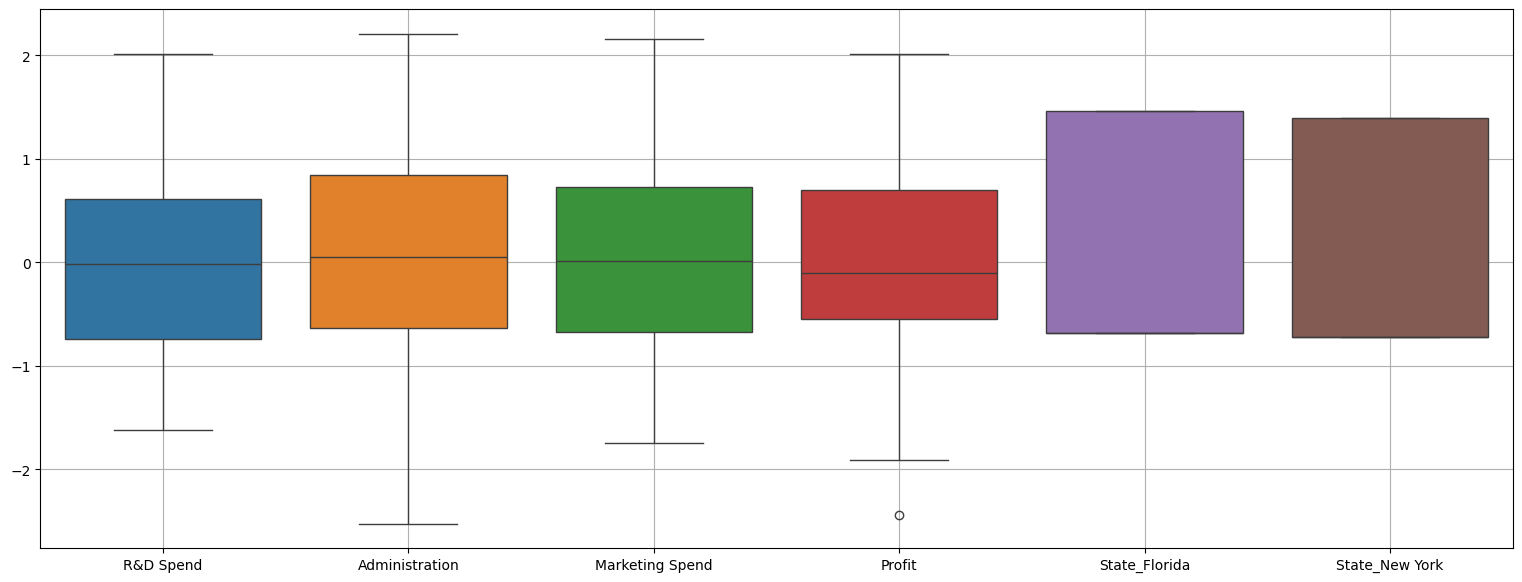

In [55]:
plt.figure(figsize=(19, 7))

sns.boxplot(startups_df)

plt.grid()

plt.show()

In [56]:
# obtain the first quartile
Q1 = startups_df.quantile(0.25)

# obtain the third quartile
Q3 = startups_df.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

R&D Spend          1.357068
Administration     1.482225
Marketing Spend    1.405644
Profit             1.243753
State_Florida      2.143732
State_New York     2.111002
dtype: float64


In [57]:
ul = Q3 + 1.5 * IQR

ll = Q1 - 1.5 * IQR

In [58]:
startups_df = startups_df[~((startups_df < ll) |(startups_df > ul)).any(axis=1)]

In [59]:
startups_df.shape

(49, 6)

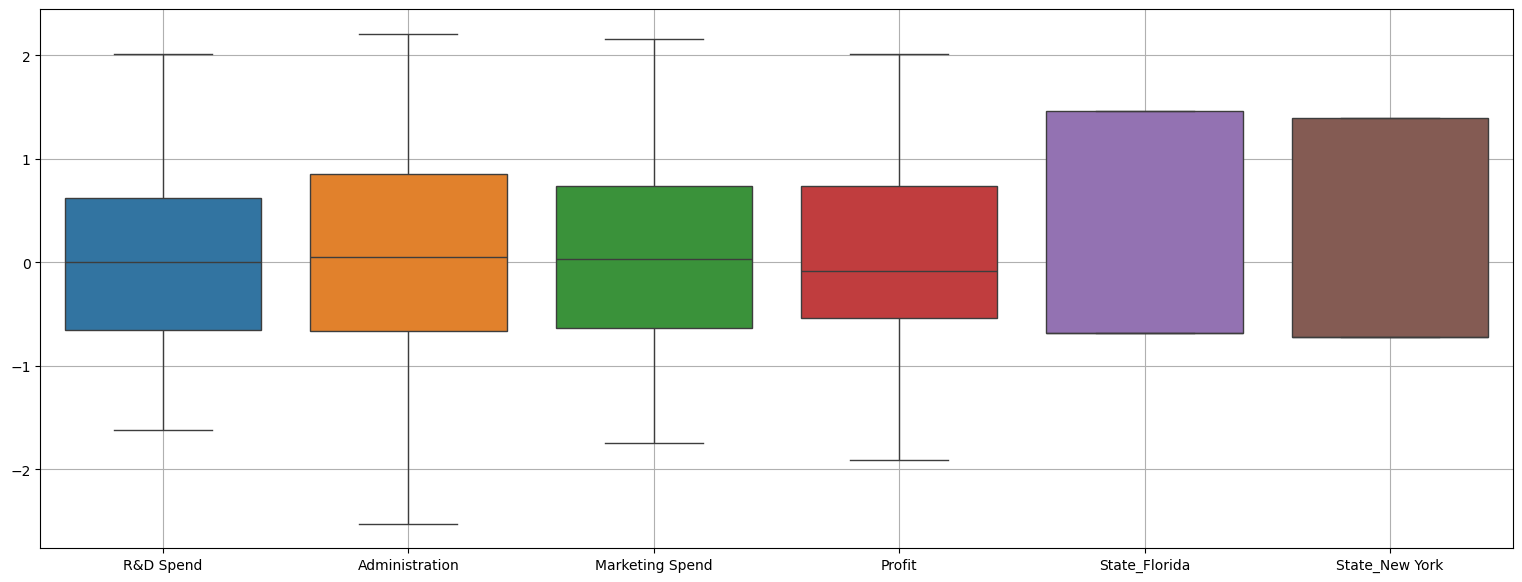

In [60]:
plt.figure(figsize=(19, 7))

sns.boxplot(startups_df)

plt.grid()

plt.show()

##### Split the independent and dependent variable

In [61]:
X = startups_df.drop('Profit', axis=1).values

y = startups_df.loc[:, 'Profit'].values

##### Train Test Split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39, 5), (10, 5), (39,), (10,))

##### Model Training

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
linear_model = LinearRegression()

In [67]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [68]:
linear_model.coef_

array([ 0.87740372, -0.04218498,  0.06661508, -0.02635625, -0.02332294])

In [69]:
linear_model.intercept_

0.018473530654336434

In [70]:
linear_model.score(X_train, y_train)

0.9627805058018273

##### Prediction

In [71]:
y_predict = linear_model.predict(X_test)

In [72]:
y_predict

array([ 0.04120213, -0.52915719, -0.58713586, -1.41920057,  1.67515091,
        1.46703762, -0.91011834, -0.25801214, -1.51943683, -0.28694085])

##### Model Evaluation

In [73]:
from sklearn.metrics import r2_score

In [74]:
r2_score(y_test, y_predict)

0.9511446681547796

In [75]:
linear_model.score(X_test, y_test)

0.9511446681547796

## Polynomial Linear Regression

Simple and Multiple Linear Regression models are used only when the data points are in a straight line.

It is not always possible to expect the data points to be in the straight line. They may form a curved line.

Polynomial Linear Regression is used on non-linear data.

Polynomial Linear Regression is a special case of Multiple Linear Regression.

In Multiple Linear Regression, each term is without any power value but in Polynomial Linear Regression, each term is raised to a power.

The first term has power 1, the second term has power 2, and the nth term has the power n.

The equation of a Multiple Linear Regression model will be of the form:

$ y = m{_1}x{_1} + m{_2}x{_2}^2 + m{_3}x{_3}^3 + ... + b $

Here y is the dependent or target variable, $ x{_1}, x{_2}, x{_3} $ are independent variables, $ m{_1}, m{_2}, m{_3} $ are coefficients of the independent variables and b is the intercept.

### Case Study

## Bias and Variance

While building a machine learning model, the data is divided into 2 parts:

* training data, to train the model
* test data, to test the model

A machine learning model should be able to yield correct results with both training and test data. Then only the model is accurate.

While using a machine learning model, the training data points would have a lot of deviations from the regression line. This shows the inability of the model to accurately represent the relationship between the data points. This is called **bias**.

Bias represents the deviations from the original data and predicted values by the model.

On the other hand, the model may fit the test data accurately on the regression line.

The difference in fits between the datasets is called **variance**.

When the model works well on train data, it represents low bias.

When the model failed on test (new) data, it represents high variance.

Bias and variance are inversely proportional to each other. What is needed is the low bias and low variance.

If the model shows high bias and low variance, it is called **underfitting**.

If the model shows low bias and high variance, it is called **overfitting**.

### Sum of Squared Residual

The Simple Linear Regression model uses a straight line to fit the data.

There are chances of some deviations from the straight line to the actual data.  These deviations must be minimized.

To minimize the deviations, calculate the sum of squares of deviations and add that to the equation of the line.

The equation of the linear regression line is given by:

$ y = {\beta}_0 + {\beta}_1 x + {\epsilon}$

$ {\epsilon} = y - {\beta}_0 - {\beta}_1 x$

$ {\epsilon} = y - ({\beta}_0 + {\beta}_1 x) $

$ {\epsilon} = y_{actual} - y_{predict} $

The error term exist for every observation in the data.

**Squared Error:**

$ {\epsilon}_i^2 = (y_{actual} - y_{predict}) ^ 2 $

**Sum of Squared Error:**

Sum of Squared Error = $ {\sum} {\epsilon}_i^2 $

**Why to take the square of the deviations?**

When deviations are taken alone, the positive and negative deviations may cancel out. But when the deviations are squared, the negative deviation becomes positive and add to the overall deviation.

## Regularization

Regularization is a technique to minimize the variance or overfitting to achieve better accuracy.

When regularization is used in Linear Regression model, there would be other variations like:

* Ridge Regression
* Lasso Regression
* ElasticNET Regression

The above 3 models are developed to minimize the variance.

### Ridge Regression

To control the impact on bias and variance, a regularization parameter by name $ {\lambda} $ is used.

When $ {\lambda} $ value is increased, it reduces the variance. But if the value of $ {\lambda} $ is increased too much, it will increase bias also. Hence it is importance to tune $ {\lambda} $ to the correct value to keep both the bias and the variance low.

The regularization pameter $ {\lambda} $ is also known as the penalty parameter.

Ridge Regression = $ {\beta}_0 + {\beta}_1 x + {\sum} {\epsilon}_i^2 +  {\lambda}   {\beta}_1 ^ 2 $

The term $ {\lambda} $ X square of the slope is called L2 Penalty term.

$ {\lambda} $ value can be anything from 0 to positive infinity. 

The addition of penalty term is called Regularization.

When $ {\lambda} $ is 0, the Ridge Regression will be equal to Simple Linear Regression. Hence Simple Linear Regression and Ridge Regression can be used on any (train or test) of the datasets.

Ridge regularization is used when there is a lot of features in the dataset and all features have small coefficients.

### Lasso Regression

LASSO stands for Least Absolute Shrinkage and Selection Operator.

Lasso Regression is same as Ridge Regression except that the penalty term is calculated by: $ {\lambda} $ X Modulus of slope.

Lasso Regression equation = $ {\beta}_0 + {\beta}_1 x + {\sum} {\epsilon}_i^2 +  {\lambda}  | {\beta}_1 | $

Lasso Regression has L1 Penalty term. L1 indicates $ {\lambda}  | {\beta}_1 | $.

Lasso Regression offers some bias but very low variance. Hence predictions will be more accurate than Ridge Regression.

Ridge Regression considers all the columns in the dataset to predict the output. But Lasso Regression selects only the columns that influence maximum on the output. Hence Lassor Regression is generally used in feature selection.

### ElasticNET Regression

ElasticNET Regression is used when a dataset has large number of columns and large volume of data.

ElasticNET Regression is a combination of Ridge and Lasso Regressions.

ElasticNET Regression equation = $ {\beta}_0 + {\beta}_1 x + {\sum} {\epsilon}_i^2 +  +  {\lambda}_1   {\beta}_1 ^ 2 + {\lambda}_2  | {\beta}_1 | $

### Case Study

In [76]:
houseprice_df = pd.read_csv("./datasets/Melbourne_housing_FULL.csv")

In [77]:
houseprice_df.shape

(34857, 21)

In [78]:
houseprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [79]:
houseprice_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [80]:
houseprice_df = houseprice_df.loc[:, ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Distance', 
                                      'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'CouncilArea', 
                                      'Regionname', 'Propertycount',
                                      'Price']]

In [81]:
houseprice_df.shape

(34857, 15)

In [82]:
houseprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Rooms          34857 non-null  int64  
 2   Type           34857 non-null  object 
 3   Method         34857 non-null  object 
 4   SellerG        34857 non-null  object 
 5   Distance       34856 non-null  float64
 6   Bedroom2       26640 non-null  float64
 7   Bathroom       26631 non-null  float64
 8   Car            26129 non-null  float64
 9   Landsize       23047 non-null  float64
 10  BuildingArea   13742 non-null  float64
 11  CouncilArea    34854 non-null  object 
 12  Regionname     34854 non-null  object 
 13  Propertycount  34854 non-null  float64
 14  Price          27247 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 4.0+ MB


In [83]:
houseprice_df['Distance'].fillna(0, inplace=True)

houseprice_df['Bedroom2'].fillna(0, inplace=True)

houseprice_df['Bathroom'].fillna(0, inplace=True)

houseprice_df['Car'].fillna(0, inplace=True)

houseprice_df['Propertycount'].fillna(0, inplace=True)

In [84]:
houseprice_df['Landsize'].fillna(houseprice_df['Landsize'].mean(), inplace=True)

houseprice_df['BuildingArea'].fillna(houseprice_df['BuildingArea'].mean(), inplace=True)

In [85]:
houseprice_df.dropna(inplace=True)

In [86]:
houseprice_df.isnull().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      0
Regionname       0
Propertycount    0
Price            0
dtype: int64

In [87]:
houseprice_df.duplicated().sum()

50

In [88]:
houseprice_df = pd.get_dummies(data=houseprice_df, drop_first=True, dtype=np.int64)

In [89]:
houseprice_df.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Price,Suburb_Aberfeldie,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,2.5,2.0,1.0,1.0,202.0,160.2564,4019.0,1480000.0,0,...,0,1,0,0,1,0,0,0,0,0
2,2,2.5,2.0,1.0,0.0,156.0,79.0000,4019.0,1035000.0,0,...,0,1,0,0,1,0,0,0,0,0
4,3,2.5,3.0,2.0,0.0,134.0,150.0000,4019.0,1465000.0,0,...,0,1,0,0,1,0,0,0,0,0
5,3,2.5,3.0,2.0,1.0,94.0,160.2564,4019.0,850000.0,0,...,0,1,0,0,1,0,0,0,0,0
6,4,2.5,3.0,1.0,2.0,120.0,142.0000,4019.0,1600000.0,0,...,0,1,0,0,1,0,0,0,0,0


In [90]:
y = houseprice_df['Price']

X = houseprice_df.drop('Price', axis=1)

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

#### Simple Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [94]:
linear_model = LinearRegression()

In [95]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [96]:
linear_model.score(X_train, y_train)

0.6827792395792723

In [97]:
linear_model.score(X_test, y_test)

0.13853683161540487

#### Ridge Regression

In [98]:
ridge_model = Ridge(alpha=1.0, max_iter=100)

In [99]:
ridge_model.fit(X_train, y_train)

Ridge(max_iter=100)

In [100]:
ridge_model.score(X_train, y_train)

0.6796668251040214

In [101]:
ridge_model.score(X_test, y_test)

0.6701765758295284

#### Lasso Regression

In [102]:
lasso_model = Lasso(alpha=50, max_iter=100)

In [103]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100)

In [104]:
lasso_model.score(X_train, y_train)

0.6767356948457683

In [105]:
lasso_model.score(X_test, y_test)

0.6637669697137103

#### ElasticNET Regression

In [106]:
elastic_model = ElasticNet(alpha=100, l1_ratio=0.5)

In [107]:
elastic_model.fit(X_train, y_train)

ElasticNet(alpha=100)

In [108]:
elastic_model.score(X_train, y_train)

0.06482342181996403

In [109]:
elastic_model.score(X_test, y_test)

0.07381459514861177